# Analysis

Anaysis by Shawn Sobieski 
for Flatiron Data Science Module 1 Project
on March, 27, 2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
movies = pd.read_csv('movies.csv')

Before I do any finacial analysis I'll need to standardize the dollar values to 2019 dollars. I'll base my estimates on an average inflation of 3.16% per year since 1915.  

In [3]:
display(movies['year'].min())
display(movies['year'].max())

1915

2019

In [4]:
movies.head()

,tconst,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,foreign_gross,genre1,genre2,genre3,primary_name,status,category,averagerating,numvotes
0,tt0249516,"Dec 31, 2012",Foodfight!,45000000,0,73706,Dec,2012,73706,Action,Animation,Comedy,Charlie Sheen,Working,actor,1.9,8248
1,tt0249516,"Dec 31, 2012",Foodfight!,45000000,0,73706,Dec,2012,73706,Action,Animation,Comedy,Sean Catherine Derek,Working,writer,1.9,8248
2,tt0249516,"Dec 31, 2012",Foodfight!,45000000,0,73706,Dec,2012,73706,Action,Animation,Comedy,Haylie Duff,Working,actress,1.9,8248
3,tt0249516,"Dec 31, 2012",Foodfight!,45000000,0,73706,Dec,2012,73706,Action,Animation,Comedy,Hilary Duff,Working,actress,1.9,8248
4,tt0249516,"Dec 31, 2012",Foodfight!,45000000,0,73706,Dec,2012,73706,Action,Animation,Comedy,Robert Engelman,Working,producer,1.9,8248


In [5]:
# create a dictionary with year keys and inflation rate values
years = sorted(range(1915,2020), reverse=True)
infl_dict = {}
infl_rate = 1/1.0316
for year in years:
    infl_rate *= 1.0316 
    infl_dict[year] = infl_rate

# define function to convert dollars to 2019 value
def adjust(value, year):
    return round(value*infl_dict[year], 2)

# assign the adjusted values to new columns
movies['adj_dom_gross'] = [adjust(movies.loc[row,'domestic_gross'],
                                  movies.loc[row,'year']) for row in range(0,len(movies))]
movies['adj_frn_gross'] = [adjust(movies.loc[row,'foreign_gross'],
                                  movies.loc[row,'year']) for row in range(0,len(movies))]
movies['adj_wide_gross'] = [adjust(movies.loc[row,'worldwide_gross'],
                                   movies.loc[row,'year']) for row in range(0,len(movies))]
movies['adj_prod_budg'] = [adjust(movies.loc[row,'production_budget'],
                                  movies.loc[row,'year']) for row in range(0,len(movies))]

# add a profit column for use in the analysis
movies['profit']=movies['adj_wide_gross']-movies['adj_prod_budg']

In [6]:
movies.groupby('movie').mean().head()

,production_budget,domestic_gross,worldwide_gross,year,foreign_gross,averagerating,numvotes,adj_dom_gross,adj_frn_gross,adj_wide_gross,adj_prod_budg,profit
movie,,,,,,,,,,,,
#Horror,1500000.0,0.0,0.0,2015.0,0.0,3.0,3092.0,0.00,0.00,0.000000e+00,1698777.86,-1.698778e+06
10 Cloverfield Lane,5000000.0,72082999.0,108286422.0,2016.0,36203423.0,7.2,260383.0,79134679.45,39745103.75,1.188798e+08,5489136.17,1.133906e+08
10 Days in a Madhouse,12000000.0,14616.0,14616.0,2015.0,0.0,6.7,1114.0,16552.89,0.00,1.655289e+04,13590222.90,-1.357367e+07
12 Rounds,20000000.0,12234694.0,17306648.0,2009.0,5071954.0,8.1,11.0,16699614.52,6922909.28,2.362252e+07,27298785.77,-3.676262e+06
12 Strong,35000000.0,45819713.0,71118378.0,2018.0,25298665.0,6.6,50155.0,47267615.93,26098102.81,7.336572e+07,36106000.00,3.725972e+07


Looks great!

# Background

The goal of the background section is look at trends of the industry overall and to to define the threshold we want to pass for two measures of success in out data: profit and audience rating.

### Industry Trends
In addition to understanding the industry over the last century, next I'll investigate trends over the last 20 years. I'll do this both because it is most relevant to our analysis, and because it is where the data is most complete. 

In [7]:
# get the amount of movies released since 2000 in our data
trends = movies[movies['year']>=2000]
trends['movie'].nunique()

1991

Great! We have nearly 2000 movies in the sample. Let's see how profits have changed in the last 20 years. We'll use average profit rather than totals to account for differences in the amount of movies in our data for each year. 

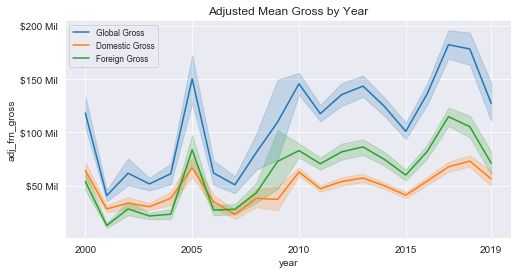

In [8]:
# plot the average profit per year
fig, ax = plt.subplots(figsize=(8,4))
plt.title('Adjusted Mean Gross by Year')
plt.yticks(ticks=[50000000,100000000,150000000,200000000], 
           labels=['$50 Mil','$100 Mil', '$150 Mil', '$200 Mil'])
plt.xticks(ticks=[2000,2005,2010,2015,2019])
sns.lineplot(y='adj_wide_gross', x='year', data=trends, label='Global Gross', ax=ax)
sns.lineplot(y='adj_dom_gross', x='year', data=trends, label='Domestic Gross', ax=ax)
sns.lineplot(y='adj_frn_gross', x='year', data=trends, label='Foreign Gross', ax=ax)

ax.legend(ncol=1, loc="upper left", frameon=True, fontsize='small');

### Defining Success

###### Profits

The median profit is: $14787479.62
The mean profit is: $95689612.93


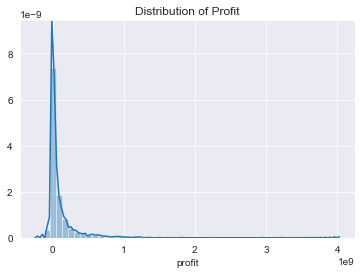

In [9]:
# group the dataframe by movie so that we can observe the distribution of profits
prodf = movies[['movie','profit']].groupby('movie').median()
plt.title('Distribution of Profit')
sns.distplot(prodf['profit']);

print('The median profit is: $' + str(round(prodf['profit'].median(),2)))
print('The mean profit is: $' + str(round(prodf['profit'].mean(),2)))

This distribution is showing some major outliers dragging the central tendency toward the huge profits even though there are many films that made zero dollars. 

In [10]:
# gather quantile data on profit
print('Top 25% of films made more than: ' + str(round(prodf['profit'].quantile(.75),2)))
print('Top 50% of films made more than: ' + str(round(prodf['profit'].quantile(.5),2)))
print('Top 75% of films made more than: ' + str(round(prodf['profit'].quantile(.25),2)))
print('100% of films made more than: ' + str(round(prodf['profit'].quantile(0),2)))

Top 25% of films made more than: 92843958.34
Top 50% of films made more than: 14787479.62
Top 75% of films made more than: -2402409.2
100% of films made more than: -200237650.0


So, 50 percent of films made over 14,787479 dollars, and 25 percent of films made over 92,843,958 dollars. That's great news for the industry, but for our analysis we'll use some more rounded numbers that are easier to process. We can arbitarily pick some numbers and see if they give us a distribution that makes sense.

In [11]:
# calculate the % of films that fall into each category
total_films = len(prodf)
print('Films with over $100 Million Dollars Profit: ' 
      +str(len(prodf[prodf['profit']>100000000]))
      +'('+str(round((len(prodf[prodf['profit']>100000000])/total_films)*100,2))+'%)')
print('Films with over $10 Million Dollars Profit: ' 
      +str(len((prodf[(prodf['profit']>10000000) & (prodf['profit']<=100000000)])))
      +'('+str(round((len(prodf[(prodf['profit']>10000000) & (prodf['profit']<=100000000)])/total_films)*100,2))+'%)')
print('Films with less than $10 Million Dollars Profit: ' 
      +str(len((prodf[(prodf['profit']>0) & (prodf['profit']<=10000000)])))
      +'('+str(round((len(prodf[(prodf['profit']>0) & (prodf['profit']<=10000000)])/total_films)*100,2))+'%)')
print('Films that lost money: '
      +str(len(prodf[prodf['profit']<0]))
      +'('+str(round((len(prodf[prodf['profit']<0])/total_films)*100, 2))+'%)')

Films with over $100 Million Dollars Profit: 514(24.18%)
Films with over $10 Million Dollars Profit: 617(29.02%)
Films with less than $10 Million Dollars Profit: 204(9.6%)
Films that lost money: 791(37.21%)


Wow, so of the sample has a huge number of failures. 37.21% of movies fail to make any money at all. And 53.2% of movies make at least 10 million dollars. These are appropriate threshold to use in our definition of success.     

Let's define 'hit' to mean any movie that makes over 10 million dollars and 'blockbuster' to mean movies that makes over 100 million dollars. Any film that makes less than 10 million dollars can be called a 'flop', and any film that loses money can be defined a 'failure'.

In [12]:
# create a categorical column for each success level
prodf.loc[prodf['profit']>100000000, 'success']='Blockbuster (> $100 mil profit)'
prodf.loc[(prodf['profit']>10000000) & (prodf['profit']<100000000), 'success']='Hit (> $10 mil profit)'
prodf.loc[(prodf['profit']>0) & (prodf['profit']<10000000), 'success']='Flop (< $10 mil profit)'
prodf.loc[prodf['profit']<0, 'success']='Failure (lost money)'

# test to make sure the column holds the information we want
prodf['success'].value_counts()

Failure (lost money)               791
Hit (> $10 mil profit)             617
Blockbuster (> $100 mil profit)    514
Flop (< $10 mil profit)            204
Name: success, dtype: int64

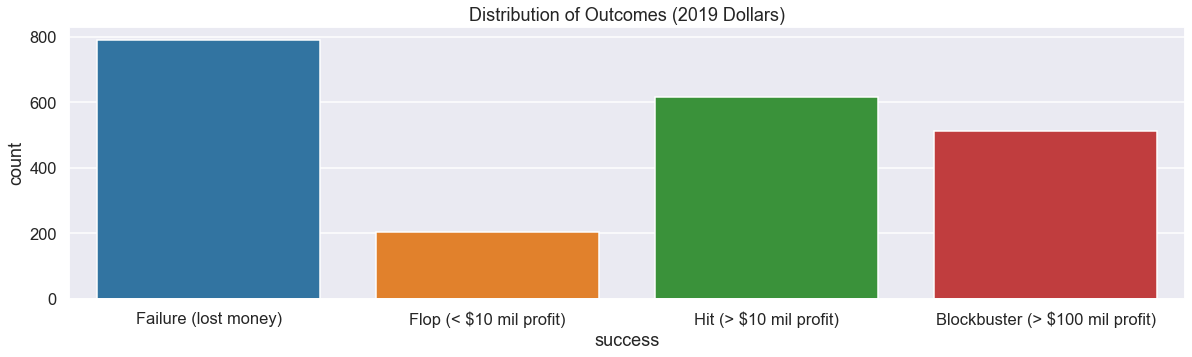

In [13]:
# check the distribution with a visualization
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(20,5))
plt.title('Distribution of Outcomes (2019 Dollars)')
sns.countplot(x=prodf['success'], data=prodf, 
              order=['Failure (lost money)','Flop (< $10 mil profit)',
                     'Hit (> $10 mil profit)','Blockbuster (> $100 mil profit)']);

So the distribution we saw in the histogram of profits can be explained by the wide spread of profits in the top half of the sample, compared to the bunching around 0 in the bottom half. Using categorical data paints a much clearer picture of the data we're looking at. We can use the 10 million dollar threshold to differentiate between success and failure.

###### Audience Rating

To determine what our definition of success will be when it comes to audience rating, we have to answer two questions at once:

- Do postive ratings lead to bigger box office returns?
- What rating threshold should we aim for? 

To answer this question we'll compare worldwide box office to the average rating of the films. Global gross is more appropriate than profit because the heart of the question doesn't rely on whether the movie made money, but rather whether more people go to see movies of high quality. Intuition says that they do, but if that intuition is correct the data will serve to back it up.

First we'll analyze whether the relationship is strong between movies in general and global gross, then we'll take a slice of the most popular movies and see if he pattern holds true.

Mean: 6.24
Median: 6.3
Max: 9.1
Min: 1.6


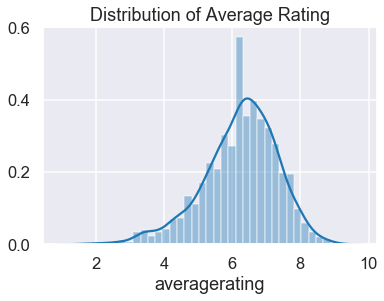

In [14]:
# create a dataframe with the necessary data
aud_rate = movies[['movie', 'averagerating', 'adj_wide_gross', 'numvotes']].groupby('movie').mean()

# plot the distribution of ratings
plt.title('Distribution of Average Rating')
sns.distplot(aud_rate['averagerating']);

# get measures of central tendency
print('Mean: '+ str(round(aud_rate['averagerating'].mean(),2)))
print('Median: '+ str(round(aud_rate['averagerating'].median(),2)))
print('Max: '+ str(round(aud_rate['averagerating'].max(),2)))
print('Min: '+ str(round(aud_rate['averagerating'].min(),2)))

It appears the ratings are roughly normally distributed around a mean of 6.24. Next let's compare the reviews to the Global Gross of each film useing a scatterplot. 

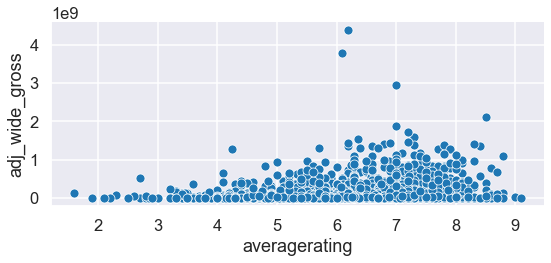

In [15]:
sns.relplot(x='averagerating', y='adj_wide_gross', data=aud_rate, aspect=2, height=4);

There appears to be a hint of positive correlation suggesting that higher quality films make more money. Next we'll look at quantile data to separate the ratings into 5 quality levels so we can look at the data categorically.

In [16]:
# get the average ratings for quantiles of the data
print('Top 20% of films average rating > ' + str(round(aud_rate['averagerating'].quantile(.8),2)))
print('Top 40% of films average rating > ' + str(round(aud_rate['averagerating'].quantile(.6),2)))
print('Top 60% of films average rating > ' + str(round(aud_rate['averagerating'].quantile(.4),2)))
print('Top 80% of films average rating > ' + str(round(aud_rate['averagerating'].quantile(.2),2)))
print('100% of films average rating > ' + str(round(aud_rate['averagerating'].quantile(0),2)))

Top 20% of films average rating > 7.1
Top 40% of films average rating > 6.6
Top 60% of films average rating > 6.1
Top 80% of films average rating > 5.4
100% of films average rating > 1.6


Alright, so it appears that the minimum rating is somewhat of an outlier in the data, and the vast majority of the ratings are within the middle 40% of data. This reflects the normal distribution that we saw above. 

Next we'll plot the categorical data on a boxplot. We'll need to do this again later, so we can define a two functions one that can group the data into 5 bins of numerical data and another that can create a boxplot. 

In [17]:
# pass df, column to be binned, the column for the x axis, the bin labels 
def make_bins(df, col, cat, bin_names=[]):
# assign values to the 'quality' column
    # bin 1
    df.loc[df.loc[:,col] > round(df.loc[:,col].quantile(.8),2),
                 cat]=bin_names[0]
    #bin 2
    df.loc[(df.loc[:,col] > round(df.loc[:,col].quantile(.6),2)) 
                 & (df.loc[:,col] <= round(df.loc[:,col].quantile(.8),2)), 
                 cat]= bin_names[1]
    #bin 3
    df.loc[(df.loc[:,col] > round(df.loc[:,col].quantile(.4),2)) 
                 & (df.loc[:,col] <= round(df.loc[:,col].quantile(.6),2)), 
                 cat]= bin_names[2]
    #bin 4
    df.loc[(df.loc[:,col] > round(df.loc[:,col].quantile(.2),2)) 
                 & (df.loc[:,col] <= round(df.loc[:,col].quantile(.4),2)), 
                 cat]= bin_names[3]
    #bin 5
    df.loc[df.loc[:,col] < round(df.loc[:,col].quantile(.2),2),
                 cat]=bin_names[4]

def cat_box(df, col, xcol, cat, bin_names=[], omitfliers=True):
    make_bins(df,col,cat,bin_names)
# plot a boxplot that shows the global gross for each category; outliers excluded
    if omitfliers==True:
        sns.catplot(y=cat, x=xcol, data=df, kind='box', 
                order=bin_names,height=5, aspect=2, showfliers=False);
    else:
        sns.catplot(y=cat, x=xcol, data=df, kind='box', 
                order=bin_names,height=5, aspect=2, showfliers=True);

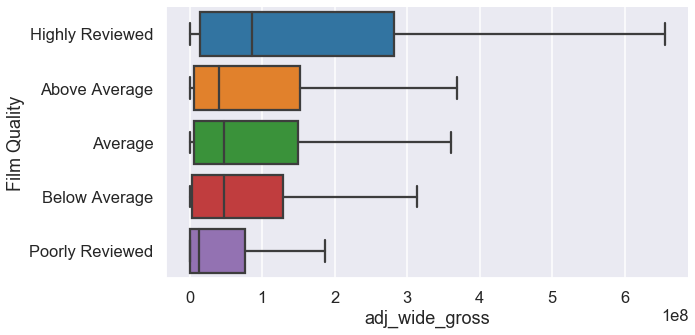

In [18]:
ratings_bins = ['Highly Reviewed', 'Above Average', 'Average', 'Below Average', 'Poorly Reviewed']
cat_box(aud_rate, 'averagerating', 'adj_wide_gross', 'Film Quality', bin_names=ratings_bins)

Unsurprisingly, highly reviewed films make more in global gross. and because of the bunching of values in the middle of the distribution above average and average films make roughly the same. 

###### Popular Movies 

But what if many of the films in this dataset are relatively unknown? Because we are seeking to invest in films with a broad audience we'll have to investigate if the pattern of high quality movies making more money holds true for more popular movies.

First we'll take a slice of the data for films that have alot of interest. We'll define that as movies that made more than $0 and crossed a threshold of number of voters for the ratings. 

Mean: 80666.36
Median: 80666.36
25% films received at least 92676.75 votes.
50% films received at least 24903.5 votes.
75% films received at least 1502.67 votes.
90% films received at least 100.0 votes.


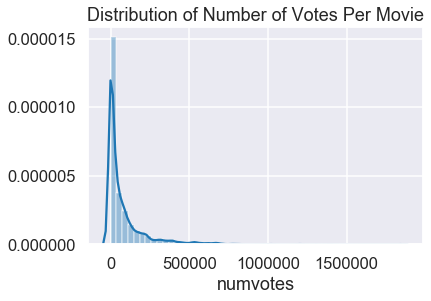

In [19]:
# investigate the distribution of number of votes to determine a threshold
plt.title('Distribution of Number of Votes Per Movie')
sns.distplot(aud_rate['numvotes']);
print('Mean: '+ str(round(aud_rate['numvotes'].mean(),2)))
print('Median: '+ str(round(aud_rate['numvotes'].mean(),2)))
print('25% films received at least {} votes.'.format(str(round(aud_rate['numvotes'].quantile(.75),2))))
print('50% films received at least {} votes.'.format(str(round(aud_rate['numvotes'].quantile(.5),2))))
print('75% films received at least {} votes.'.format(str(round(aud_rate['numvotes'].quantile(.25),2))))
print('90% films received at least {} votes.'.format(str(round(aud_rate['numvotes'].quantile(.10),2))))

There is a huge discrepancy between the top fifty percent of films and the bottom fifty, validating the hypothesis that many of the films are unknown. Fifty percent seems like a usefull threshold, so we'll call movies that received at least 24903 votes 'popular'. 

Mean: 6.57
Median: 6.6
Max: 8.8
Min: 1.6


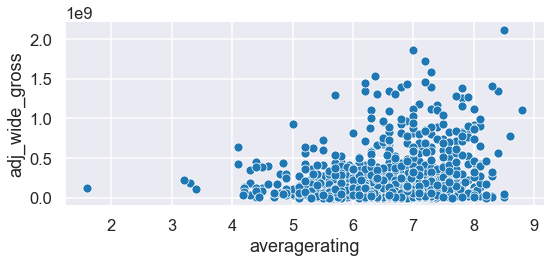

In [20]:
# create a dataframe using a slice of the audience rating dataframe
pop_movies = aud_rate.loc[(aud_rate.loc[:,'numvotes']>=24903) & (aud_rate.loc[:,'adj_wide_gross']>0)]

# get the measures of central tendency for this dataframe
print('Mean: '+ str(round(pop_movies['averagerating'].mean(),2)))
print('Median: '+ str(round(pop_movies['averagerating'].median(),2)))
print('Max: '+ str(round(pop_movies['averagerating'].max(),2)))
print('Min: '+ str(round(pop_movies['averagerating'].min(),2)))

# plot the data in a scatterplot
sns.relplot(x='averagerating', y='adj_wide_gross', data=pop_movies, height=4, aspect=2);

Wow! Although there are still many well reviewed movies that made less money, the trend is even more clear with this slice of the data. To finish up our analysis let's look at this slice categorically.

C:\Users\Shawn\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


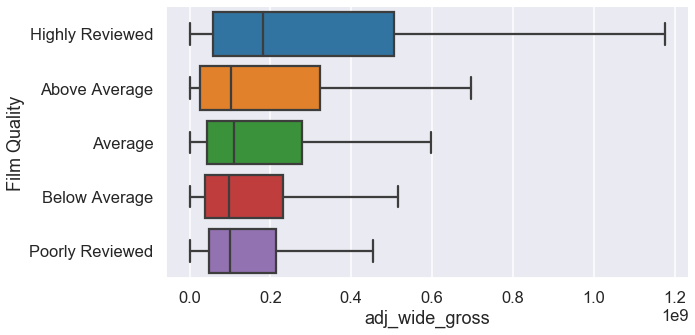

In [21]:
cat_box(pop_movies, 'averagerating', 'adj_wide_gross', 'Film Quality', bin_names=ratings_bins)

The pattern we saw above is even more apparent with popular films. We can use a threshold of above average ratings to define success.

# Background Conclusion

The movie industry is growing, especially due to the increase in foreign box office returns. To determine success for the remainder of the analysis we will be using the thresholds described above and summarized here.

###### Profit

- Blockbuster-  > 100 million dollars profit
- Hit-          > 10 million dollars profit
- Flop-         < 10 million dollars profit
- Failure-      < 0 dollars profit

###### Quality

- Highly Reviewed-  average rating > 7.1
- Above Average-    average rating > 6.6
- Average-          average rating > 6.1
- Below Average-    average rating > 5.4
- Poorly Reviewed-  average rating > 1.6



# Question 1

#### How much money should be invested?
##### 1a. Does higher production budget lead to higher rating?
##### 1b. Which investment level leads to the highest profits?
##### 1c. What amount of risk come with different investment levels?

For this analysis I will again be using audience rating, but this time I will also be analyzing profit. Both of these factors will be compared to production costs so I can reccomend a target investment amount per film. 

Mean: 45763179.17
Median: 22965043.25


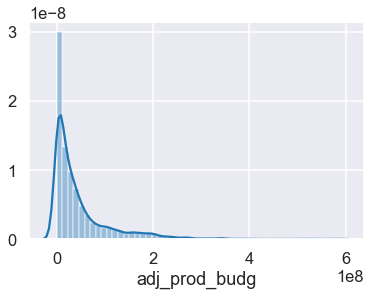

In [22]:
# slice a piece of the dataframe with data about produciton costs
costs = movies[['movie', 'profit', 'averagerating', 'adj_prod_budg', 'adj_wide_gross']].groupby('movie').mean()

# plot the distribution of the costs
sns.distplot(costs['adj_prod_budg']);

# print the measures of central tendency
print('Mean: '+ str(round(costs['adj_prod_budg'].mean(),2)))
print('Median: '+ str(round(costs['adj_prod_budg'].median(),2)))

As we saw above it will be useful to divide these into categories to make analysis more comprehensible.

In [23]:
# create quantile variables to improve legibility
quant1 = round(costs['adj_prod_budg'].quantile(.8),2)
quant2 = round(costs['adj_prod_budg'].quantile(.6),2)
quant3 = round(costs['adj_prod_budg'].quantile(.4),2)
quant4 = round(costs['adj_prod_budg'].quantile(.2),2)

# We'll print the quantile of the costs so we can name category bins
print('The top 20% of movies by cost spend at least ${}'.format(quant1))
print('The top 40% of movies by cost spend at least ${}'.format(quant2))
print('The top 60% of movies by cost spend at least ${}'.format(quant3))
print('The top 80% of movies by cost spend at least ${}'.format(quant4))

The top 20% of movies by cost spend at least $71490309.78
The top 40% of movies by cost spend at least $32843038.68
The top 60% of movies by cost spend at least $15104303.98
The top 80% of movies by cost spend at least $4094817.87


We now have five different levels of cost that we can use to categorize data. We can name them 'Huge', 'Big, 'Average', 'Small', and 'Tiny'.

In [24]:
cost_bins = ['Huge', 'Big', 'Average', 'Small', 'Tiny']

### Question 1a

We determined that making a high quality film will lead to better outcomes. When it comes to production budget, does spending more lead to a higher quality movie? To answer this I'll do a simple scatter plot and observe the distibution of the values:

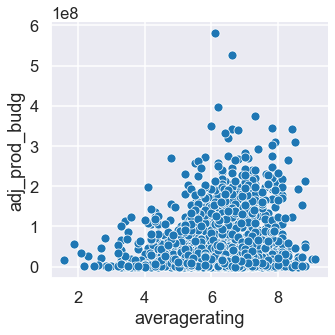

In [25]:
sns.relplot(y='adj_prod_budg', x='averagerating', data=costs);

There seems to be a slight positive correlation. Now I'll look at how the data looks in categorical form:

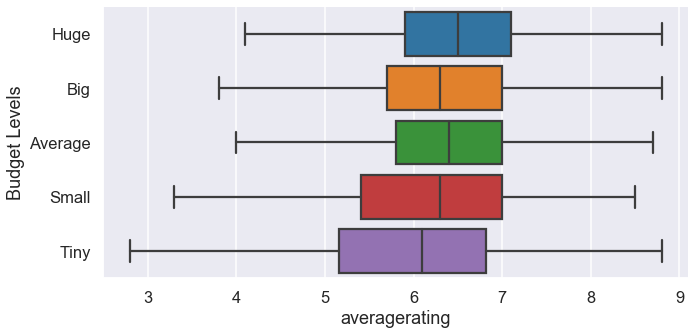

In [26]:
cat_box(costs, 'adj_prod_budg', 'averagerating', 'Budget Levels', bin_names=cost_bins)

So, investment in any budget range can result in a high quality film. Looking at the left whiskers of the boxes though, it seems that huge bugdets may be a more reliable investment.

### Question 1b

We know we want to make as much money as possible, but is that more likely if we release several films with a given budget or throw it all into one big blockbuster? To answer this I'll assess the scatter plot of production budget by profit:

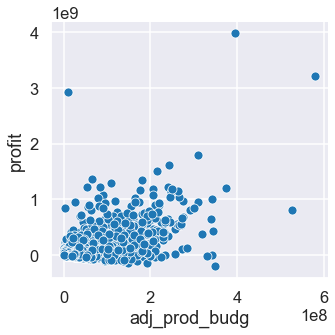

In [27]:
sns.relplot(x='adj_prod_budg', y='profit', data=costs);

The scatterplot indicates that there is a positive correlation, let's take a look at the data catagorically:

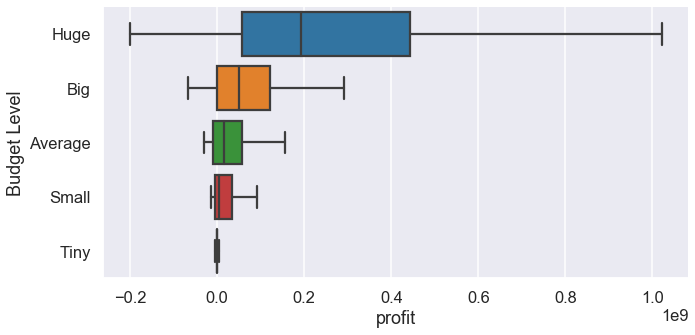

In [28]:
cat_box(costs, 'adj_prod_budg', 'profit', 'Budget Level', bin_names=cost_bins)

Without the outliers it's clear that Blockbuster level investment will lead to Blockbuster level profits. A failed Blockbuster will lead to the most losses though, which is why further analysis is needed.

### Question 1c

To understand the risks associated with a film I'll calculate the expected return on investment of a film. This will tell us the value we'll expect to earn on average for a given production cost.

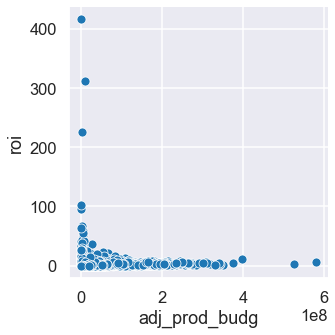

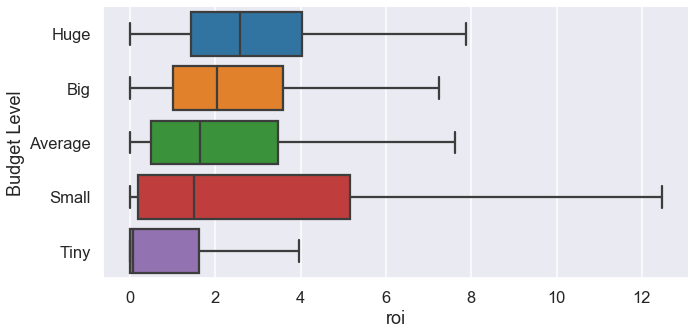

In [29]:
#by this caluculation anything less than one is a loss
costs['roi']= (costs['adj_wide_gross']/costs['adj_prod_budg'])

sns.relplot(x='adj_prod_budg', y='roi', data= costs);

cat_box(costs, 'adj_prod_budg', 'roi', 'Budget Level', bin_names=cost_bins)

Taken together these two plots tell a strange story. Because of the small budgets involved it seems like some outliers are skewing the data for small budget films. Let's remove outliers from the boxplot.

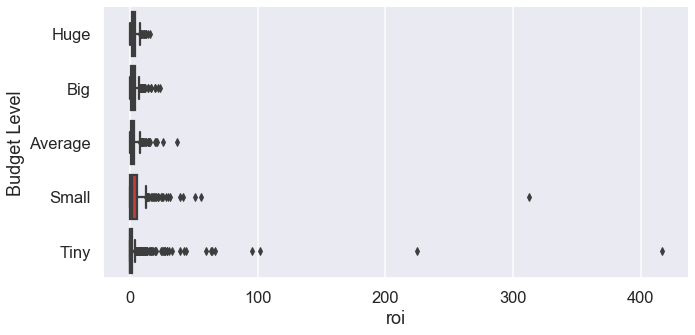

In [30]:
cat_box(costs, 'adj_prod_budg', 'roi', 'Budget Level', bin_names=cost_bins, omitfliers=False)

Wow, I was right. Using return on investment won't be an effective measure of success because of these outliers. We'll use profit to calculate expected profit.

To get more details about the potential risks of investing in a film I'll calculate loss and success rate and visualize it. I'll be doing this again later, so I'll define a function.  

In [31]:
def simple_successdf(df,group, measure, threshold):
    df.loc[df[measure]> threshold, 'success']=True
    df.loc[df[measure]<= threshold, 'success']=False
    df['count']=1
    successdf = df[['success', group, 'count']].groupby(group).sum()
    successdf['winrate'] = round(successdf['success']/successdf['count'],2)
    successdf['lossrate'] = 1 - successdf['winrate']
    
# add columns values that we'll need for the graph
    successdf['bin']=sorted(df[group].unique())
    successdf['total']=successdf['winrate']+successdf['lossrate']
    successdf.sort_values('winrate', axis=0, ascending=False, inplace=True)
    return successdf

def simple_rate(df,group,bin_label, measure, threshold):
    successdf = simple_successdf(df,group, measure, threshold)
    print('Overall Success Rate is: {}'.format(round(df['success'].sum()/df['count'].sum(),2)))
    display(successdf[['winrate','lossrate']])

# then we create a plot
    f, ax = plt.subplots(figsize=(12, 8))

    sns.set_color_codes('deep')
    sns.barplot(x='total', y='bin', data=successdf,
                label='Fail Rate', color="b")

    sns.set_color_codes('deep')
    sns.barplot(x='winrate', y='bin', data=successdf,
                label='Success Rate', color="g")

    ax.legend(ncol=1, loc='lower left', frameon=True, fontsize='xx-small')
    ax.set(ylabel=bin_label,
            xlabel='Success Rate');
    sns.despine(top=True, right=True, bottom=True)

Now we can calculate the success rate for each budget level with various thresholds. First we can calculate details for movies that atleast made money.

Overall Success Rate is: 0.63


,winrate,lossrate
Budget Level,,
Huge,0.88,0.12
Big,0.75,0.25
Average,0.61,0.39
Small,0.57,0.43
Tiny,0.33,0.67


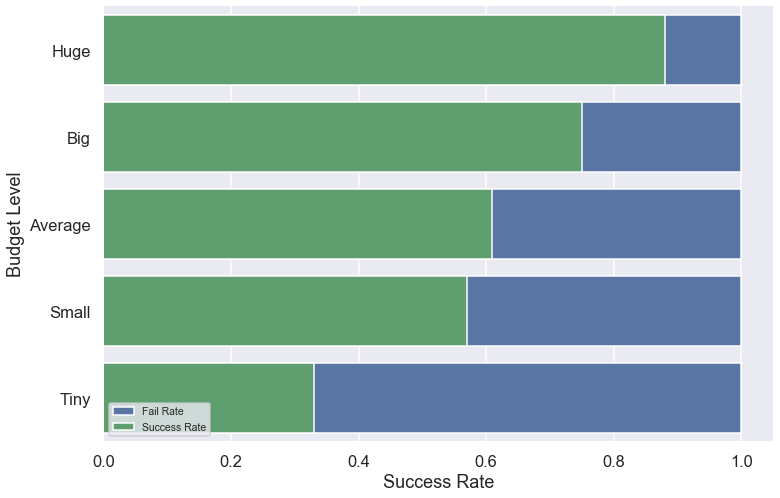

In [32]:
simple_rate(costs,'Budget Level','Budget Level', 'profit', 0)

Next, let's check the success rate for movies making more than 10 million dollars.

Overall Success Rate is: 0.53


,winrate,lossrate
Budget Level,,
Huge,0.85,0.15
Big,0.69,0.31
Average,0.56,0.44
Small,0.45,0.55
Tiny,0.12,0.88


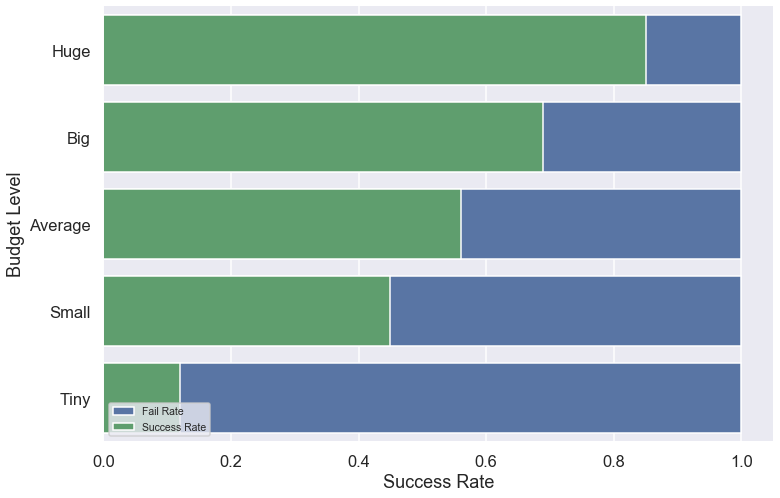

In [33]:
simple_rate(costs,'Budget Level','Budget Level', 'profit', 10000000)

It's useful to have a simple measure of success, but previously in the analysis we defined four levels of success for the profit measure and five levels for audience rating. We can adapt this function to create a single visualization that can breakdown certain columns into these levels of success.  

In [34]:
def tiered_successdf(df,group, measure):

# calculate success in in profit     
    if measure == 'profit':
        df['count']=1
    
# create columns that track what level of success a film reached
        df.loc[df.loc[:,'profit']>= 100000000, 'BB']=True
        df.loc[(df.loc[:,'profit']>= 10000000)&(df.loc[:,'profit']<100000000), 'HT']=True
        df.loc[(df.loc[:,'profit']> 0)&(df.loc[:,'profit']<10000000), 'FP']=True
        df.loc[df.loc[:,'profit']<= 0, 'FL']=True
        df.fillna(False, inplace=True)
        
# create columns with a rate of each success level
        successdf = df[['BB', 'HT', 'FP', 'FL', group, 'count']].groupby(group).sum()
        successdf['blockrate'] = round(successdf['BB']/successdf['count'],2)
        successdf['hitrate'] = round(successdf['HT']/successdf['count'],2)
        successdf['floprate'] = round(successdf['FP']/successdf['count'],2)
        successdf['failrate'] = round(successdf['FL']/successdf['count'],2)
    
# add columns values that we'll need for the graph
        successdf['bin']=sorted(df[group].unique())
        successdf['block']= (successdf.loc[:,'blockrate']+successdf.loc[:,'hitrate']
                             +successdf.loc[:,'floprate']+successdf.loc[:,'failrate'])
        successdf['hit']= (successdf.loc[:,'hitrate']+successdf.loc[:,'floprate']
                            +successdf.loc[:,'failrate'])
        successdf['flop']= successdf.loc[:,'floprate']+successdf.loc[:,'failrate']
        successdf['fail']= successdf.loc[:,'failrate']
        successdf.sort_values('blockrate', axis=0, ascending=False, inplace=True)
        return successdf
    
# calculate success in in rating     
    elif measure == 'averagerating':
    
# create columns that track what level of success a film reached
        df.loc[df.loc[:,'averagerating']>= 7.1, 'WR']=True
        df.loc[(df.loc[:,'averagerating']>= 6.6)&(df.loc[:,'averagerating']<7.1), 'AA']=True
        df.loc[(df.loc[:,'averagerating']>= 6.1)&(df.loc[:,'averagerating']<6.6), 'AV']=True
        df.loc[(df.loc[:,'averagerating']>= 5.4)&(df.loc[:,'averagerating']<6.1), 'BA']=True
        df.loc[(df.loc[:,'averagerating']< 5.4), 'PR']=True
        df.fillna(False)
    
# create columns with a rate of each success level
        successdf = df[['WR', 'AA', 'AV', 'BA', 'PR', group, 'count']].groupby(group).sum()
        successdf['wellrevrate'] = round(successdf['WR']/successdf['count'],2)
        successdf['aboverate'] = round(successdf['AA']/successdf['count'],2)
        successdf['avgrate'] = round(successdf['AV']/successdf['count'],2)
        successdf['belrate'] = round(successdf['BA']/successdf['count'],2)
        successdf['poorrate'] = round(successdf['PR']/successdf['count'],2)
    
# add columns values that we'll need for the graph
        successdf['bin']=sorted(df[group].unique())
        successdf.sort_values('wellrevrate', axis=0, ascending=False, inplace=True)
        return successdf

def tiered_rates(df,group,bin_label, measure):
    successdf = tiered_successdf(df,group, measure)

# then we create a plot
    f, ax = plt.subplots(figsize=(12, 8))

    sns.set_color_codes('deep')
    sns.barplot(x='block', y='bin', data=successdf,
                label='Blockbuster Rate', color='g')
    
    sns.set_color_codes('deep')
    sns.barplot(x='hit', y='bin', data=successdf,
                label='Hit Rate', color='b')
    
    sns.set_color_codes('deep')
    sns.barplot(x='flop', y='bin', data=successdf,
                label='Flop Rate', color='y')

    sns.set_color_codes('deep')
    sns.barplot(x='fail', y='bin', data=successdf,
                label='Failure Rate', color='r')

    ax.legend(ncol=1, loc='lower left', frameon=True, fontsize='xx-small')
    ax.set(ylabel=bin_label,
            xlabel='Success Rate');
    sns.despine(top=True, right=True, bottom=True)

Now we can analyze budget levels using the tiered rates.

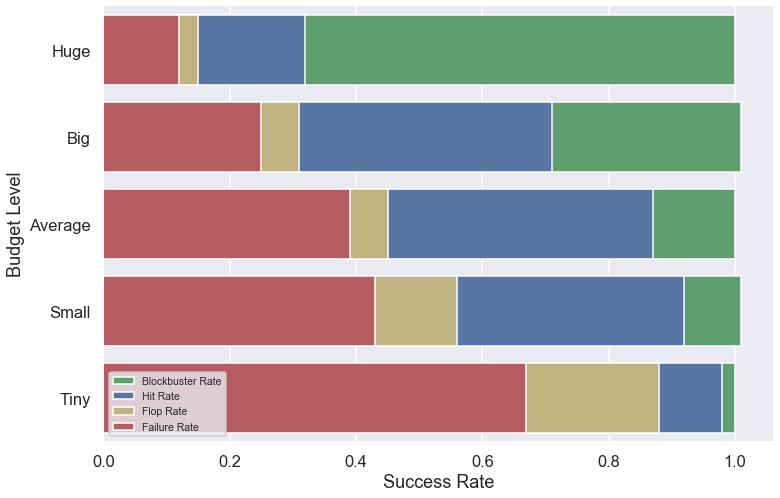

In [35]:
tiered_rates(costs, 'Budget Level', 'Budget Level', 'profit')

Everything is pointing to huge budgets being the best investment. But spending over 70,000,000 dollars also leaves an investor open to a considerable amount of risk. 

To understand the amount of risk best we'll calculate expected profits by multiplying median loss and gain per budget level with their respective chances of occuring.  

We'll also be doing this later, so we can use another function. I'll add a conditional parameter because later we'll want to combine this with the success rate function. 

In [36]:
def calculate_expected(df, group, bin_label, show_rates=True):
    if show_rates==True:
        simple_rate(df,group,bin_label, 'profit', 0)

    successdf = simple_successdf(df,group, 'profit', 0)

# Combine the failed movies and successful movies into two separate dataframes
    losers = df[df['profit']<=0].groupby(group).median()
    winners = df[df['profit']>0].groupby(group).median()

# use the median profits from each group as values in the successdf
    successdf['medl']=losers['profit']
    successdf['medp']=winners['profit']
    
# weight the losses and successes by their liklihood
    successdf['expectedprofit']=(successdf['medl']*successdf['lossrate'])+(successdf['medp']*successdf['winrate'])
    successdf.sort_values('expectedprofit', axis=0, inplace=True, ascending=False)
    display(successdf[['winrate','lossrate','expectedprofit']])
    
# draw the barplot
    fig, ax2 = plt.subplots(figsize=(12, 8))
    sns.barplot(y='bin', x='expectedprofit', data=successdf, ax=ax2, palette='deep')
    sns.despine(top=True, right=True)
    ax2.set(ylabel=bin_label,
            xlabel='Expected Profit');

Overall Success Rate is: 0.63


,winrate,lossrate
Budget Level,,
Huge,0.88,0.12
Big,0.75,0.25
Average,0.61,0.39
Small,0.57,0.43
Tiny,0.33,0.67


,winrate,lossrate,expectedprofit
Budget Level,,,
Huge,0.88,0.12,2.056064e+08
Big,0.75,0.25,5.162169e+07
Average,0.61,0.39,2.367492e+07
Small,0.57,0.43,1.292532e+07
Tiny,0.33,0.67,8.277834e+05


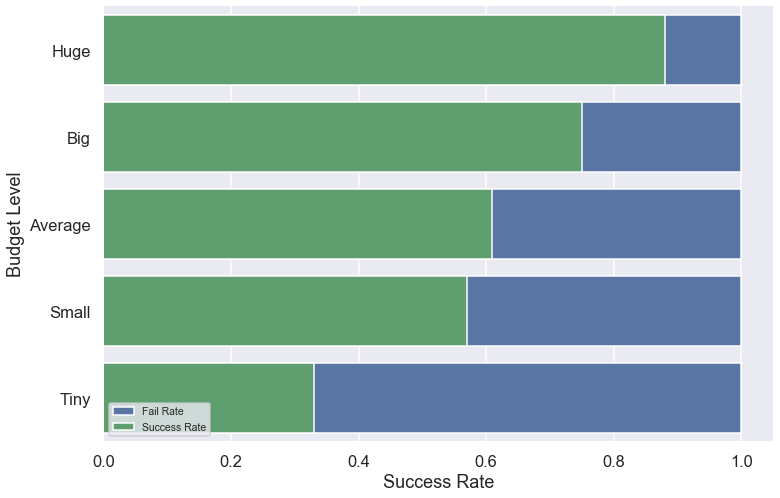

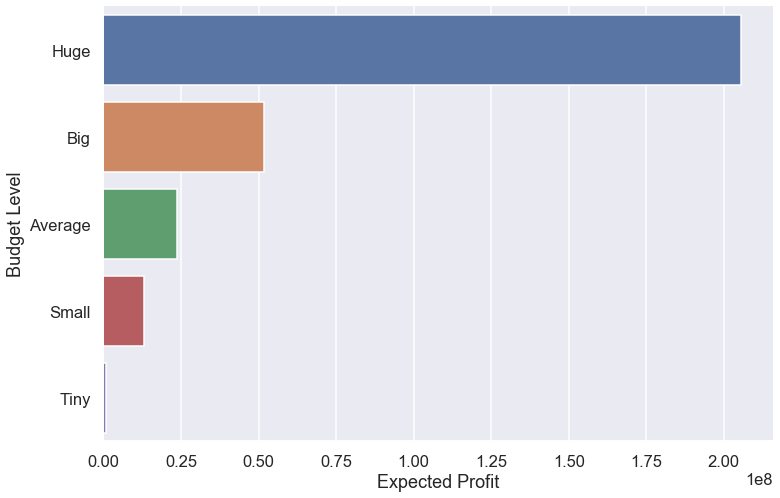

In [37]:
calculate_expected(costs, 'Budget Level', 'Budget Level', show_rates=True)

# Question 1 Conclusion

The budget level with the highest potential for profit is huge, somewhat counterintuitively it also has the lowest risk. Aside from a few outliers in the smaller budget categories this holds true for return on investment. 

Finally, over the course of many films blockbusters provide the highest expected profit by far. Given the potential risks of failure however, and the fact that big budget films still perform fairly well, my recommendation is that we invest in films with production budgets no less than $50 million dollars. 

# Question 2

#### What kind of films should we produce?
- Once we know what kind of film, when should we release it?

We now know that movies that are more well reviewed tend to perform better financially, as well as movies that are heavily invested in. Now, our analysis will shift to what kinds of movie we should make. To analyse this I'll need to understand a little more about film genre. Because the dataframe currently has three columns for genre I'll have to manipulate the data quite a bit to get it into a form that will be useful.  

In [38]:
# First slice only the data I need into three separate dataframes
genre1 = movies.loc[:,['genre1', 'profit', 'month', 'adj_prod_budg',
                 'adj_dom_gross', 'adj_frn_gross', 'adj_wide_gross']]
genre2 = movies.loc[:,['genre2', 'profit', 'month', 'adj_prod_budg', 
                 'adj_dom_gross', 'adj_frn_gross', 'adj_wide_gross']]
genre3 = movies.loc[:,['genre3', 'profit', 'month', 'adj_prod_budg', 
                 'adj_dom_gross', 'adj_frn_gross', 'adj_wide_gross']]

#then rename the genre columns so that 
genre1.rename(columns={'genre1':'genre'}, inplace=True)
genre2.rename(columns={'genre2':'genre'}, inplace=True)
genre3.rename(columns={'genre3':'genre'}, inplace=True)

#finally, join the dataframes and slice the None values away
genre = pd.concat([genre1,genre2,genre3], sort=False)
genre = genre[genre['genre']!='None']

display(genre.head())
print('\n There are {} unique genres. They are:'.format(genre['genre'].nunique()))
display(genre['genre'].unique())

,genre,profit,month,adj_prod_budg,adj_dom_gross,adj_frn_gross,adj_wide_gross
0,Action,-55857298.7,Dec,55948938.09,0.0,91639.39,91639.39
1,Action,-55857298.7,Dec,55948938.09,0.0,91639.39,91639.39
2,Action,-55857298.7,Dec,55948938.09,0.0,91639.39,91639.39
3,Action,-55857298.7,Dec,55948938.09,0.0,91639.39,91639.39
4,Action,-55857298.7,Dec,55948938.09,0.0,91639.39,91639.39



 There are 22 unique genres. They are:


array(['Action', 'Adventure', 'Comedy', 'Horror', 'Drama', 'Biography',
       'Crime', 'Documentary', 'Animation', 'Fantasy', 'Mystery',
       'Thriller', 'Musical', 'Romance', 'Family', 'Sci-Fi', 'Music',
       'Western', 'Sport', 'War', 'History', 'News'], dtype=object)

This will lead to particular movies being in the dataframe more than once, but that is appropriate because the analysis I'll be performing is of genre in general, not the performances of any particular film. First, we'll look at the average profit of each genre and the average production cost. In other words film can be representative of two or three separate genres. 

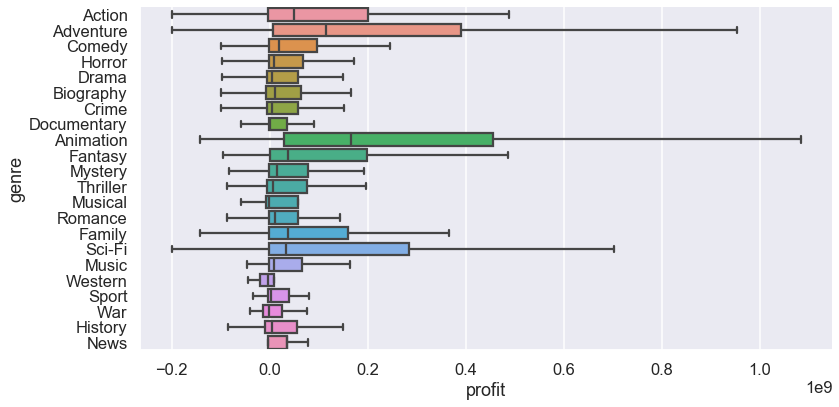

In [39]:
sns.catplot(y='genre', x='profit', data=genre, kind='box', height=6, aspect=2, showfliers=False);

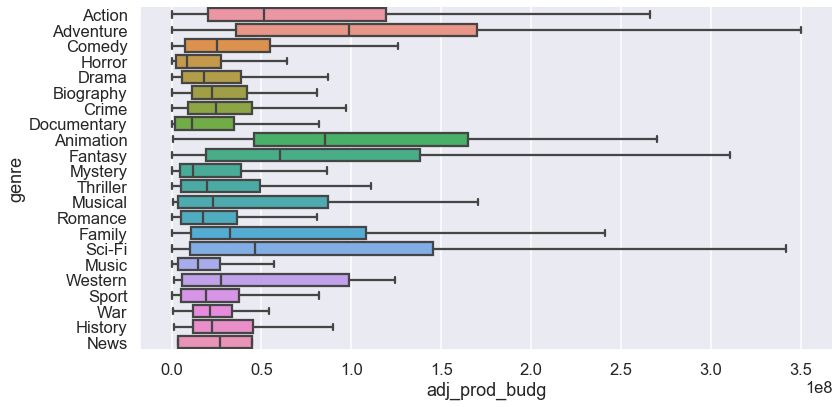

In [40]:
sns.catplot(y='genre', x='adj_prod_budg', data=genre, kind='box', height=6, aspect=2, showfliers=False);

Beautiful! We have an idea of what genres of movies perform well, as well as their average production budgets. Interestingly, animated and adventure movies stand out in both charts. 

As we saw above, performing well in foreign markets is crucial for a successful movie. So, let's compare success of genres in domestic and foreign markets.

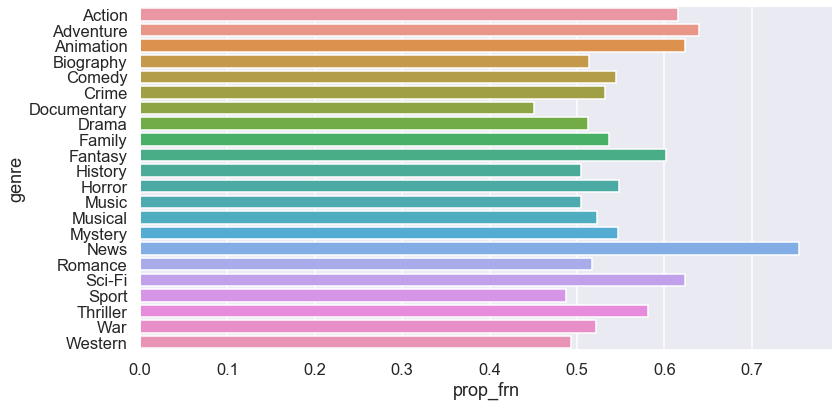

In [41]:
#calculate the proportion of profits that come from foreign markets
genre['Genre']=genre['genre']
genre_grouped = genre.groupby('Genre').mean()
genre_grouped['genre']= sorted(genre['genre'].unique())
genre_grouped['prop_frn'] = genre_grouped['adj_frn_gross']/genre_grouped['adj_wide_gross']
sns.catplot(y='genre', x='prop_frn', data=genre_grouped, kind='bar', height=6, aspect=2);

Most of these genres make over half their money abroad, with the exception of Documentary, Sports and Westerns. That's valuable to know, but probably not enlightening enough to affect a reccomendation. Success rate and expected profit will likely present a more compelling case.

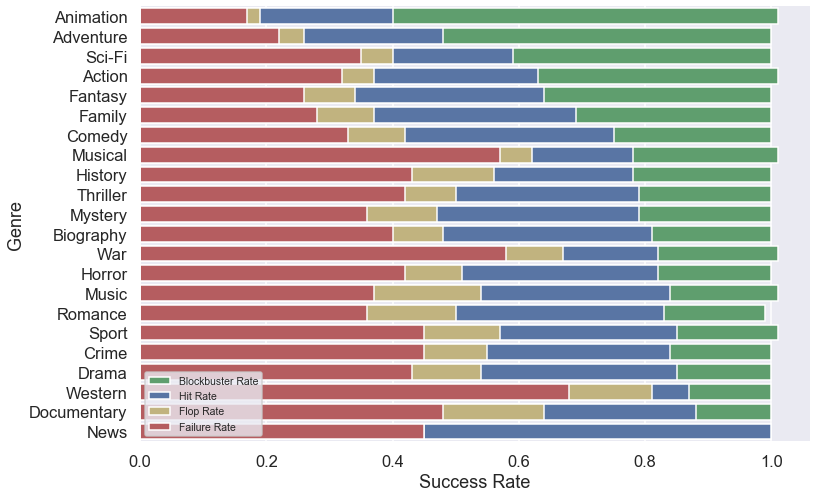

In [42]:
tiered_rates(genre, 'genre', 'Genre', 'profit')

#### Expected Profit

Overall Success Rate is: 0.63


,winrate,lossrate
genre,,
Animation,0.83,0.17
Adventure,0.78,0.22
Fantasy,0.74,0.26
Family,0.72,0.28
Action,0.68,0.32
Comedy,0.67,0.33
Sci-Fi,0.65,0.35
Romance,0.64,0.36
Mystery,0.64,0.36


,winrate,lossrate,expectedprofit
genre,,,
Animation,0.83,0.17,2.001358e+08
Adventure,0.78,0.22,1.455637e+08
Sci-Fi,0.65,0.35,1.098254e+08
Action,0.68,0.32,8.075910e+07
Musical,0.43,0.57,7.500800e+07
Fantasy,0.74,0.26,6.635264e+07
Family,0.72,0.28,5.639894e+07
Comedy,0.67,0.33,4.145630e+07
Mystery,0.64,0.36,3.817177e+07


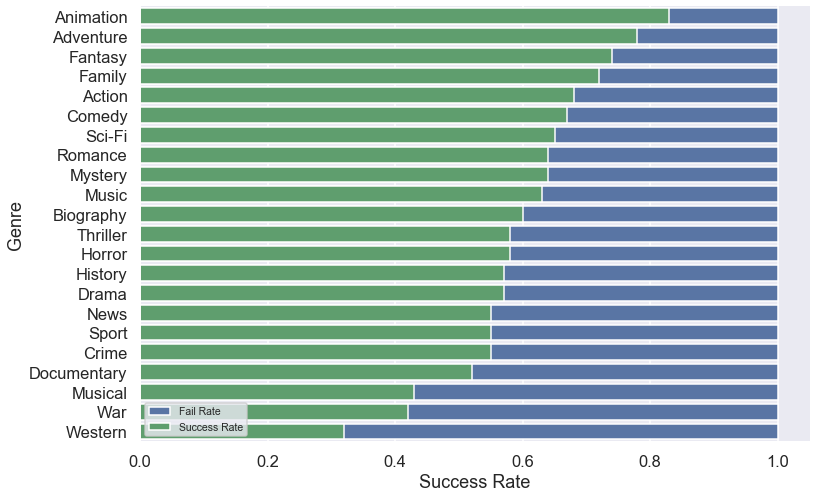

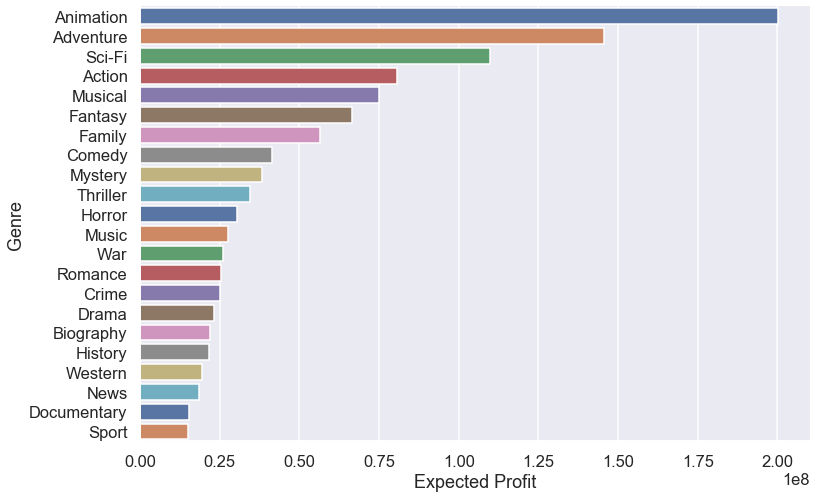

In [43]:
calculate_expected(genre, 'genre', 'Genre')

There are nine genres that have an above average success rate. Of those nine, four are in the top five of the expcted profits ranking. My reccomendation is to invest in that group of four, Animation, Adventure, Action, or Sci-fi. Animation and adventure are especially interesting due to the fact that they also tend to have high budgets, which we already observed is correlated with success.

#### When should we release the film?

To know when we should release a film we can analyze the month by month data for each genre that we've chosen.

In [44]:
# first slice only the genres we want to analyze into their own dataframes
aniwhen = genre[genre['genre']=='Animation']
advwhen = genre[genre['genre']=='Adventure']
actwhen = genre[genre['genre']=='Action']
sciwhen = genre[genre['genre']=='Sci-Fi']

##### Animation Expected Profit by Month

C:\Users\Shawn\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Shawn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,winrate,lossrate,expectedprofit
month,,,
Jun,0.83,0.17,5.047109e+08
May,0.82,0.18,3.349436e+08
Nov,0.94,0.06,2.319350e+08
Mar,0.83,0.17,2.153875e+08
Feb,0.70,0.30,2.054845e+08
Dec,0.72,0.28,1.106932e+08
Apr,0.70,0.30,1.062091e+08
Aug,0.56,0.44,2.395262e+07
Jan,1.00,0.00,NaN


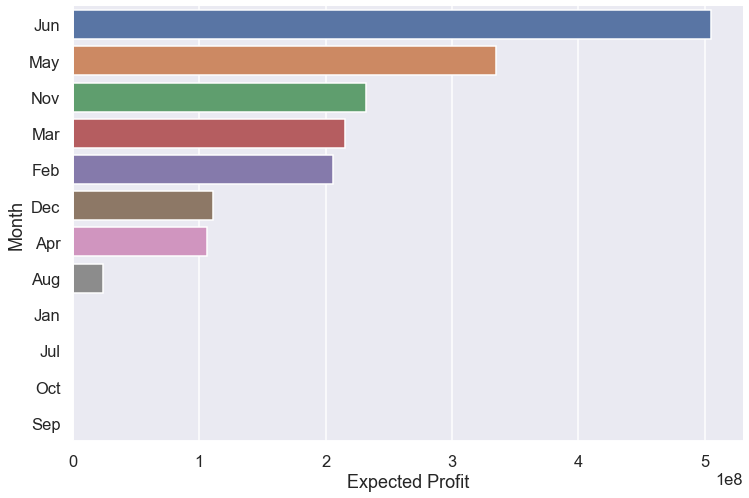

In [45]:
calculate_expected(aniwhen, 'month', 'Month', show_rates=False)

###### Adventure Expected Profit By Month

C:\Users\Shawn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,winrate,lossrate,expectedprofit
month,,,
May,0.87,0.13,3.467011e+08
Nov,0.92,0.08,3.458976e+08
Jun,0.89,0.11,3.176111e+08
Jul,0.79,0.21,2.066270e+08
Mar,0.74,0.26,1.384415e+08
Dec,0.73,0.27,1.378024e+08
Feb,0.69,0.31,1.122535e+08
Apr,0.70,0.30,1.062091e+08
Aug,0.80,0.20,7.068488e+07


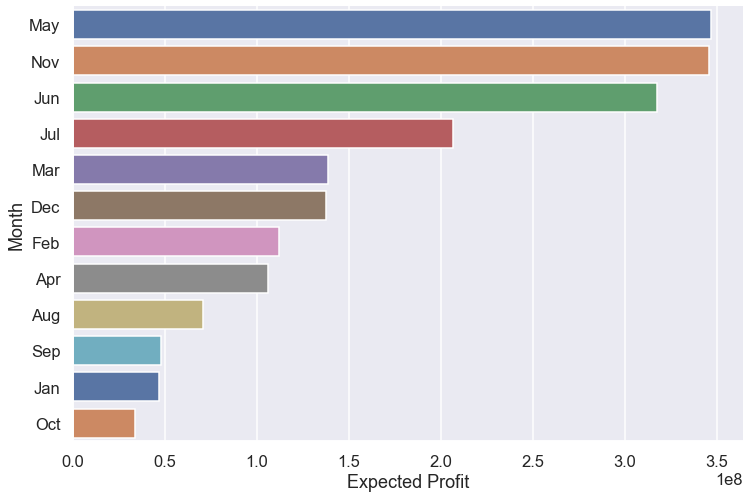

In [46]:
calculate_expected(advwhen, 'month', 'Month', show_rates=False)

###### Action Expected Profit By Month

C:\Users\Shawn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,winrate,lossrate,expectedprofit
month,,,
May,0.76,0.24,2.519656e+08
Jun,0.77,0.23,1.847381e+08
Jul,0.77,0.23,1.308757e+08
Nov,0.66,0.34,1.106031e+08
Mar,0.65,0.35,9.294485e+07
Feb,0.75,0.25,8.140687e+07
Oct,0.72,0.28,7.733000e+07
Apr,0.75,0.25,4.764573e+07
Jan,0.67,0.33,4.704411e+07


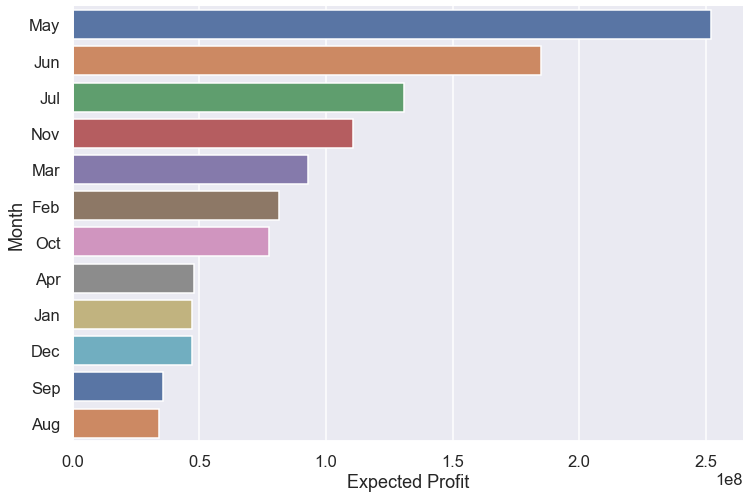

In [47]:
calculate_expected(actwhen, 'month', 'Month', show_rates=False)

###### Sci-Fi Expected Profit By Month

C:\Users\Shawn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,winrate,lossrate,expectedprofit
month,,,
May,0.74,0.26,3.980737e+08
Jun,0.74,0.26,2.544827e+08
Nov,0.67,0.33,2.404589e+08
Jul,0.78,0.22,1.287047e+08
Mar,0.70,0.30,7.869657e+07
Dec,0.38,0.62,7.809098e+07
Oct,0.51,0.49,6.198240e+07
Feb,0.75,0.25,6.129794e+07
Apr,0.75,0.25,4.932727e+07


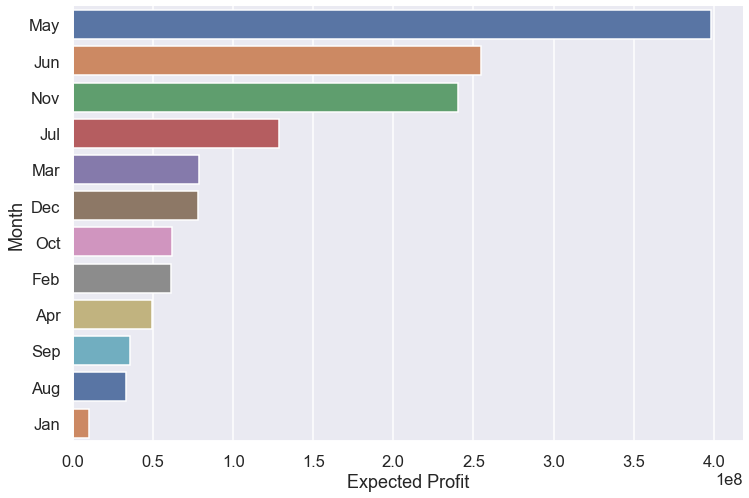

In [48]:
calculate_expected(sciwhen, 'month', 'Month', show_rates=False)

# Question 2 Conclusion

# Question 3

#### Who should we hire?

We'll start to analyze this question by exploring the data on movie professionals. Then, we'll slice the data to find a top 10 list for particular roles for the kind of movie we want to make.

In [ ]:
# check how many roles exist in the dataset
movies['category'].value_counts()

Let's analyze the best people for the job in the top 5 roles: actor, actress, director, producer, and writer.

Narrowing down the most successful people will first require that we slice away anyone with that has passed away. We will also get a slice that contains only people with a specific role.  

To narrow it down even further, we'll slice only people who's movies have performed in the 'successful' range. To do that I'll group the dataframe by people's names, gathering the total boxoffice and average rating.

Then I'll filter out people whose films have rated below our threshold for success.

Finally, I'll take the top 25 people sorted by total profit and plot their numbers on a scatterplot showing their average audience rating compared to their total profit. 

In [ ]:
def slice_role(role):
    temp = movies[(movies['category']==role) & (movies['status']=='Working')]
     
# create dataframes
    grouped = temp.groupby('primary_name').sum()
    grouped['averagerating']=temp.groupby('primary_name').mean()['averagerating']
    grouped['averageprofit']=temp.groupby('primary_name').mean()['profit']
    grouped[role] = sorted(temp['primary_name'].unique())

    grouped = grouped.loc[grouped.loc[:,'averageprofit']>10000000]
    grouped = grouped.loc[grouped.loc[:,'averagerating']>6.3]
    grouped.sort_values('profit', axis=0, inplace=True, ascending=False)
    grouped = grouped[:15]
    grouped.sort_values('profit', axis=0, inplace=True)
    
    sns.set_style('darkgrid')
    sns.relplot(y=role, x='averagerating', size='profit', sizes=(200,1200), data=grouped, height=8, aspect=1.2, color='g')
    plt.title(('15 Most Profitable {}s'.format(role)).title())

In [ ]:
role_list=['actor', 'actress', 'director', 'writer', 'producer']
for role in role_list:
    slice_role(role)

# Question 3 Conclusion

Due to systemic biases it is important to note that the use of historical data should not be the only factor we use to cast a film. Therefore, while I can only use the data to make a reccomendation, it is also important recommend that we seek out diverse viewpoints and perspectives in all industries, especially one as high profile as film. This analysis is limited by the data it uses.   

That being said, using the lists above to select qualified candidates is my recommendation.  